In [1]:
%pylab inline
import os, sys
from datetime import datetime
from dateutil.relativedelta import relativedelta
import json
import numpy as np
import matplotlib.pylab as plt
import matplotlib.dates as mdates

import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
bookshelf = json.loads(open('docs/bookshelf.json','r').read())['books']
count = 0
for b in bookshelf:
    if '(' in b['name'] and ')' in b['name']:
        #print b['name']#.split('(')[-1].split(')')[0]
        count += int(b['name'].split('(')[-1].split(')')[0])
    else:
        count += 1
print (count, 'books read')

310 books read


In [3]:
monthly = dict()
monthlyA, monthlyB = dict(), dict()
for b in bookshelf:
    if len(b['date'].split('-')) < 2:
        continue
    dstr = '-'.join(b['date'].split('-')[:2])
    if dstr not in monthly:
        monthly[dstr] = 0
        monthlyA[dstr] = 0
        monthlyB[dstr] = 0
        
    if '(' in b['name'] and ')' in b['name']:
        #print b['name']#.split('(')[-1].split(')')[0]
        nBook = int(b['name'].split('(')[-1].split(')')[0])
        monthly[dstr] += nBook
        if 'audio' in b:
            monthlyA[dstr] += nBook
        else:
            monthlyB[dstr] += nBook
    else:
        monthly[dstr] += 1
        if 'audio' in b:
            monthlyA[dstr] += 1
        else:
            monthlyB[dstr] += 1
            
print (monthly, sum(monthly.values()))

{'2017-09': 1, '2017-08': 2, '2017-07': 1, '2017-06': 3, '2017-05': 3, '2017-04': 1, '2017-02': 1, '2017-01': 5, '2016-12': 2, '2016-11': 5, '2016-10': 5, '2016-09': 2, '2016-08': 2, '2016-07': 6, '2016-06': 5, '2016-05': 3, '2016-02': 1, '2016-01': 3, '2015-12': 4, '2015-11': 4, '2015-10': 3, '2015-07': 1, '2015-06': 3, '2015-04': 1, '2015-03': 3, '2015-02': 4, '2015-01': 2, '2014-12': 4, '2014-08': 4, '2014-07': 3, '2014-06': 3, '2014-05': 4, '2014-04': 3, '2014-03': 1, '2013-12': 1, '2013-08': 1, '2013-07': 2, '2013-05': 1, '2013-03': 2, '2013-02': 3, '2013-01': 2, '2012-11': 1, '2012-10': 2, '2012-09': 1, '2012-08': 2, '2012-05': 1, '2012-03': 1, '2012-02': 2, '2012-01': 4, '2011-12': 2, '2011-11': 2, '2011-09': 7, '2011-08': 7, '2011-07': 1, '2011-06': 4, '2011-05': 3, '2011-04': 2, '2011-03': 3, '2011-02': 1, '2010-11': 1, '2010-10': 1, '2010-09': 4, '2010-08': 1, '2010-07': 2, '2010-05': 1, '2010-04': 1, '2010-03': 2, '2009-11': 2, '2010-02': 4, '2009-06': 3, '2009-05': 2, '2009

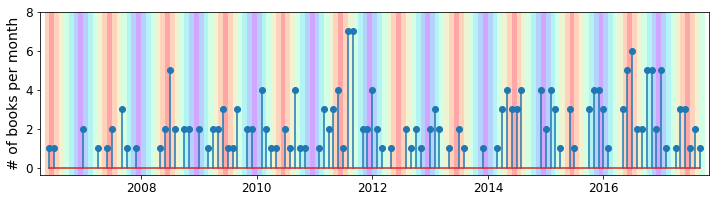

In [4]:
mSorted = sorted(monthly.keys())
#for m in mSorted:
#    print m, monthly[m], datetime.strptime(m, '%Y-%m')
    
fig = plt.figure(figsize=(12,3))
plt.stem([datetime.strptime(m, '%Y-%m') for m in mSorted], [monthly[m] for m in mSorted])
plt.ylim(ymax=max(monthly.values())+1)
plt.xlim(xmin=datetime.strptime(mSorted[0], '%Y-%m') + relativedelta(months=-2), 
         xmax=datetime.strptime(mSorted[-1], '%Y-%m') + relativedelta(months=+2))

sDate = datetime.strptime(mSorted[0], '%Y-%m') + relativedelta(months=-1)
eDate = datetime.strptime(mSorted[-1], '%Y-%m') + relativedelta(months=+1)
while sDate < eDate:
    temp = sDate + relativedelta(months=+1)
    cval = 1-abs(sDate.month-6)/6.0
    plt.axvspan(sDate, temp, facecolor=plt.cm.rainbow(cval),#'{}'.format(), 
                edgecolor='none',alpha=0.35)
    sDate = temp

plt.ylabel('# of books per month', fontsize=14)
plt.tick_params(labelsize=12)
plt.savefig('docs/reading_monthly_freq_stem.png', bbox_inches='tight', dpi=300, transparent=True)

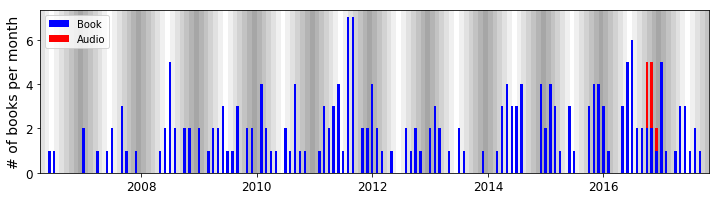

In [5]:
fig = plt.figure(figsize=(12,3))
mSorted = sorted(monthly.keys())
sDate = datetime.strptime(mSorted[0], '%Y-%m') + relativedelta(months=-2)
eDate = datetime.strptime(mSorted[-1], '%Y-%m') + relativedelta(months=+2)
while sDate < eDate:
    temp = sDate + relativedelta(months=+1)
    cval = 1-abs(sDate.month-6)/6.0
    plt.axvspan(sDate, temp, facecolor=plt.cm.gray(cval),#'{}'.format(), 
                edgecolor='none',alpha=0.35)
    sDate = temp

mSorted = [m for m in sorted(monthlyB.keys()) if monthlyB[m]>0]
plt.bar([datetime.strptime(m, '%Y-%m') for m in mSorted], 
        [monthlyB[m] for m in mSorted], label='Book', 
        width = 15, linewidth=0, color='b')

mSortedA = [m for m in sorted(monthlyA.keys()) if monthlyA[m]>0]
plt.bar([datetime.strptime(m, '%Y-%m') for m in mSortedA], 
        [monthlyA[m] for m in mSortedA],
        bottom=[monthlyB.get(m,0) for m in mSortedA],
        label='Audio', linewidth=0, color='r', width=15)
plt.xlim(xmin=datetime.strptime(mSorted[0], '%Y-%m') + relativedelta(months=-2), 
         xmax=datetime.strptime(mSorted[-1], '%Y-%m') + relativedelta(months=+2))
plt.ylabel('# of books per month', fontsize=14)
plt.tick_params(labelsize=12)
plt.legend(loc='upper left')
plt.savefig('docs/reading_monthly_freq.png', bbox_inches='tight', dpi=300, transparent=True)

In [7]:
authorCount = dict()

for b in bookshelf:
    if b['author'] not in authorCount:
        authorCount[b['author']] = 0
    
    if '(' in b['name'] and ')' in b['name']:
        #print b['name']#.split('(')[-1].split(')')[0]
        authorCount[b['author']] += int(b['name'].split('(')[-1].split(')')[0])
    else:
        authorCount[b['author']] += 1

for a in sorted(authorCount, key=authorCount.get, reverse=True)[:20]:
    print (a, authorCount[a])

Gulten Dayioglu 15
Margaret Weis &amp; Tracy Hickman 11
Stephen King 10
Paulo Coelho 7
J.K. Rowling 7
Rifat Ilgaz 6
Jules Verne 5
Stanislaw Lem 4
L. Frank Baum 4
Amin Maalouf 4
Sigmund Freud 4
Bernard Werber 4
Christopher Grange 4
Dan Brown 4
Ursula K. LeGuin 3
Can Dundar 3
Roger Penrose 3
Irvine Yalom 3
Aldoux Huxley 3
J.R.R. Tolkien 3


In [8]:
# Inter-event time for finishing books
readDates = list()
for b in bookshelf:
    if len(b['date'].split('-')) < 3:
        continue
    readDates.append(datetime.strptime(b['date'], '%Y-%m-%d'))
print(len(readDates))

sortedDates = sorted(readDates)
print (sortedDates)
tdiff = [(sortedDates[i]-sortedDates[i-1]).days for i in range(1, len(sortedDates))]
print (tdiff)

#plt.figure(figsize=(4,4))
#plt.hist(sorted(tdiff)[:-3])

54
[datetime.datetime(2009, 5, 20, 0, 0), datetime.datetime(2015, 1, 23, 0, 0), datetime.datetime(2015, 12, 9, 0, 0), datetime.datetime(2015, 12, 25, 0, 0), datetime.datetime(2015, 12, 26, 0, 0), datetime.datetime(2015, 12, 30, 0, 0), datetime.datetime(2016, 1, 15, 0, 0), datetime.datetime(2016, 1, 18, 0, 0), datetime.datetime(2016, 1, 30, 0, 0), datetime.datetime(2016, 2, 7, 0, 0), datetime.datetime(2016, 5, 13, 0, 0), datetime.datetime(2016, 5, 16, 0, 0), datetime.datetime(2016, 5, 20, 0, 0), datetime.datetime(2016, 6, 5, 0, 0), datetime.datetime(2016, 6, 15, 0, 0), datetime.datetime(2016, 6, 16, 0, 0), datetime.datetime(2016, 6, 17, 0, 0), datetime.datetime(2016, 6, 30, 0, 0), datetime.datetime(2016, 7, 5, 0, 0), datetime.datetime(2016, 7, 8, 0, 0), datetime.datetime(2016, 7, 11, 0, 0), datetime.datetime(2016, 7, 15, 0, 0), datetime.datetime(2016, 7, 21, 0, 0), datetime.datetime(2016, 7, 24, 0, 0), datetime.datetime(2016, 8, 9, 0, 0), datetime.datetime(2016, 8, 18, 0, 0), datetime.d